# 911 Calls Exploratory Data Ananlysis

#### Performing EDA to underestand the 911 Calls made across PA
#### Emergency (911) Calls: Fire, Traffic, EMS for Montgomery County, PA

## Read & Understand Data

In [1]:
# Supress warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt

In [3]:
# Configuring max rows & columns
pd.set_option('display.max_columns' , 300)

In [4]:
# Read the data file
calls_df = pd.read_csv("911.csv")

# Head of the calls dataframe
calls_df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
# Check the shape of the dataframe
calls_df.shape

(99492, 9)

In [6]:
# Check the column names
calls_df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [7]:
# Check the total rows, columns , data types ,not null values of the dataframe
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [8]:
# Check th statistical summary
calls_df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


### Data Cleaning

In [9]:
# Check the missing values
calls_df.isnull().sum() / len(calls_df.index) * 100

lat           0.000000
lng           0.000000
desc          0.000000
zip          12.920637
title         0.000000
timeStamp     0.000000
twp           0.043220
addr          0.521650
e             0.000000
dtype: float64

### zip

In [10]:
# lets check the unique values & impute the missing value & 0 with the most frequent value
calls_df['zip'].unique()

array([19525., 19446., 19401.,    nan, 19044., 19426., 19438., 19462.,
       19428., 19040., 19027., 18936., 18974., 19031., 19403., 19422.,
       19085., 18964., 19038., 19406., 19468., 19010., 19095., 19464.,
       19444., 19041., 19440., 19405., 19002., 19096., 19454., 19465.,
       19004., 19066., 19072., 18041., 19046., 19090., 19012., 19025.,
       19473., 18073., 18969., 18074., 19460., 19001., 18054., 19009.,
       19006., 19035., 19150., 19075., 19034., 19151., 19453., 19003.,
       18914., 19512., 18976., 19120., 18915., 18076., 19477., 19087.,
       18966., 19131., 19128., 19083., 19053., 19475., 18960., 19504.,
       18070., 19492., 18932., 19118., 18092., 19490., 19518., 18056.,
       19119., 19107., 18103., 17752., 19111., 18927., 19435., 18951.,
       19472., 19503., 19126., 19505., 19423., 19138., 36107., 18036.,
       19116., 19139., 19129., 19115., 19355., 77316., 19457., 19082.,
       19127.])

In [11]:
# Lets impute the missing values in 'zip' column

calls_df['zip'] = calls_df['zip'].replace(np.nan , calls_df['zip'].mode()[0])

### twp

In [12]:
# lets iumpute the missing values & 0's in'twp' column with the most frequent value

# lets check the unique values
calls_df['twp'].unique()

array(['NEW HANOVER', 'HATFIELD TOWNSHIP', 'NORRISTOWN',
       'LOWER POTTSGROVE', 'LANSDALE', 'HORSHAM', 'SKIPPACK',
       'LOWER SALFORD', 'PLYMOUTH', 'MONTGOMERY', 'UPPER MORELAND',
       'CHELTENHAM', 'UPPER MERION', 'WHITEMARSH', 'UPPER GWYNEDD',
       'LOWER PROVIDENCE', 'UPPER DUBLIN', 'WHITPAIN', 'DELAWARE COUNTY',
       'FRANCONIA', 'WEST CONSHOHOCKEN', 'LOWER MERION', 'LIMERICK',
       'TOWAMENCIN', 'DOUGLASS', 'POTTSTOWN', 'BRIDGEPORT', 'AMBLER',
       'CHESTER COUNTY', 'UPPER HANOVER', 'SPRINGFIELD', 'ROCKLEDGE',
       'ABINGTON', 'WEST NORRITON', 'ROYERSFORD', 'UPPER SALFORD',
       'LOWER MORELAND', 'CONSHOHOCKEN', 'PENNSBURG', 'TELFORD',
       'EAST NORRITON', 'UPPER FREDERICK', 'UPPER PROVIDENCE', 'SALFORD',
       'HATFIELD BORO', 'LEHIGH COUNTY', 'LOWER GWYNEDD', 'MARLBOROUGH',
       'BRYN ATHYN', 'HATBORO', 'WORCESTER', 'COLLEGEVILLE',
       'SCHWENKSVILLE', 'PERKIOMEN', 'SOUDERTON', 'UPPER POTTSGROVE',
       'LOWER FREDERICK', nan, 'BUCKS COUNTY', 'RED 

In [13]:
# Lets check the value counts
calls_df['twp'].value_counts(dropna = False , normalize = True ) * 100

LOWER MERION     8.486109
ABINGTON         6.007518
NORRISTOWN       5.920074
UPPER MERION     5.253689
CHELTENHAM       4.598360
                   ...   
SALFORD          0.163832
GREEN LANE       0.051260
PHILA COUNTY     0.043220
NaN              0.043220
LEHIGH COUNTY    0.030153
Name: twp, Length: 69, dtype: float64

In [14]:
# Lets impute the missing values with the most frequent values
calls_df['twp'] = calls_df['twp'].replace(np.nan , calls_df['twp'].mode()[0] )

### addr

In [15]:
# Lets check the value counts
calls_df['addr'].value_counts(dropna = False , normalize = True ) * 100

SHANNONDELL DR & SHANNONDELL BLVD     0.942789
NaN                                   0.521650
MAIN ST & OLD SUMNEYTOWN PIKE         0.391991
THE FAIRWAY  & RYDAL RD               0.261328
GULPH RD & KIRK AVE                   0.236200
                                        ...   
PERKIOMEN BLVD & S COLLEGEVILLE RD    0.001005
MILL ST & W 6TH ST                    0.001005
DUNKIRK CT & CHADWICK CIR             0.001005
W DEKALB PIKE & SHAFFER RD            0.001005
GALIE WAY & SHANNON WAY               0.001005
Name: addr, Length: 21915, dtype: float64

In [16]:
# lets check the unique values & impute the missing value & 0 with the most frequent value
calls_df['addr'].unique()

array(['REINDEER CT & DEAD END', 'BRIAR PATH & WHITEMARSH LN', 'HAWS AVE',
       ..., 'ARNOLD RD & ST PAULS RD', 'SHEAFF LN & WHITEMARSH VALLEY RD',
       'PARK DR & N ADAMS ST'], dtype=object)

In [17]:
# Lets impute the missing values with the most frequent values
calls_df['addr'] = calls_df['addr'].replace(np.nan , calls_df['addr'].mode()[0] )

### New Features Creations

#### title & timestamp can be split to make new features that will give some usefull & meaningful inshights in further analysis

#### timestamp column:

In [18]:
# Lets create seperate columns for day, month, year & time
calls_df['timeStamp'].head()

0    2015-12-10 17:40:00
1    2015-12-10 17:40:00
2    2015-12-10 17:40:00
3    2015-12-10 17:40:01
4    2015-12-10 17:40:01
Name: timeStamp, dtype: object

In [19]:
calls_df['timeStamp'] = pd.to_datetime(calls_df['timeStamp'] , format = '%Y-%m-%d %H:%M:%S')

In [20]:
# Lets create new column for year, day, month,hour

calls_df['Year']    = calls_df['timeStamp'].dt.year
calls_df['Month']   = calls_df['timeStamp'].dt.month
calls_df['Day']     = calls_df['timeStamp'].dt.day
calls_df['Weekday'] = calls_df['timeStamp'].dt.dayofweek
calls_df['Hour']    = calls_df['timeStamp'].dt.hour

In [21]:
# Lets look the head of the data
calls_df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Weekday,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,10,3,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,10,3,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,2015,12,10,3,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,12,10,3,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,12,10,3,17


In [22]:
#  Lets map Months from 1-12 as "January" to 'December'
calls_df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [23]:
# Lets map the months
calls_df['Month'] = calls_df['Month'].map({1: 'January', 2:'February' , 3: 'March' , 4: 'April' , 5: 'May',
                                           6: 'June' , 7:'July' ,8: 'August' , 9: 'September', 10: 'October' ,
                                           11: 'November' , 12: 'December'})

In [24]:
# Lets create the 'Weekday' from 'Monday' - Sunday' 
calls_df['Weekday'].unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

In [25]:
# Lets map the weekdays 
calls_df['Weekday'] = calls_df['Weekday'].map({1: 'Monday' , 2: 'Tuesday' , 3: 'Wednesday',
                                              4: 'Thursday' , 5: 'Friday' , 6 :'Saturday' ,
                                              7: 'Sunday'})

#### title column

In [26]:
# Lets look the data in the title column
calls_df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [27]:
# Here we observe that each unique valuse starts with 'EMS' or 'Fire'or 'Traffic'. 
# Lets split that data & create a new column 'Purpose'

calls_df['Purpose'] = calls_df['title'].apply(lambda x: x.split(":")[0])

In [28]:
# Lets check the unique values in purpose column
calls_df['Purpose'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [29]:
# Lets look the head of the data
calls_df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Weekday,Hour,Purpose
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,2015,December,10,Wednesday,17,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,December,10,Wednesday,17,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,2015,December,10,Wednesday,17,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,December,10,Wednesday,17,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,December,10,Wednesday,17,EMS


In [30]:
# Lets check the data types
calls_df.dtypes

lat                 float64
lng                 float64
desc                 object
zip                 float64
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
e                     int64
Year                  int64
Month                object
Day                   int64
Weekday              object
Hour                  int64
Purpose              object
dtype: object

## Data Visualization

### Univariate Analysis

### Purpose

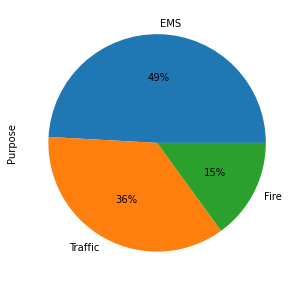

In [31]:
# Lets chcek the purpose of the 911 calls
plt.figure(figsize = (8,5))
calls_df['Purpose'].value_counts().plot.pie(autopct = '%.0f%%')
plt.show()

#### Most of the 911 calls are due to 'EMS' and least calls due to Fire Emergency

### zip

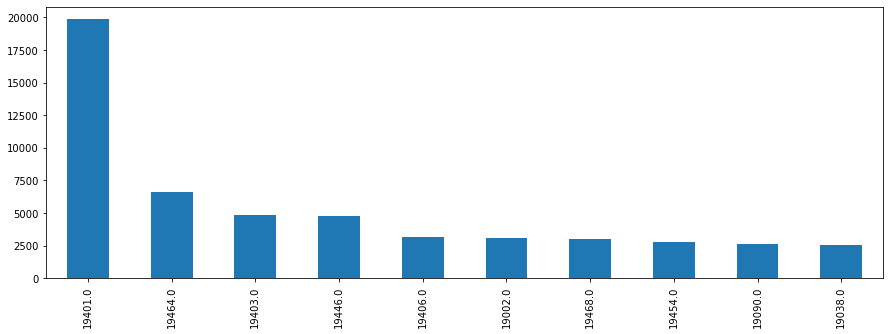

In [32]:
# Lets check the top 10 frequency Zip codes from where the most of the callers make 911 calls
(calls_df['zip'].value_counts()).head(10).plot.bar(figsize=(15,5))
plt.show()

#### Most frequent calls (close to 20k calls)  received from 19401 zip around 

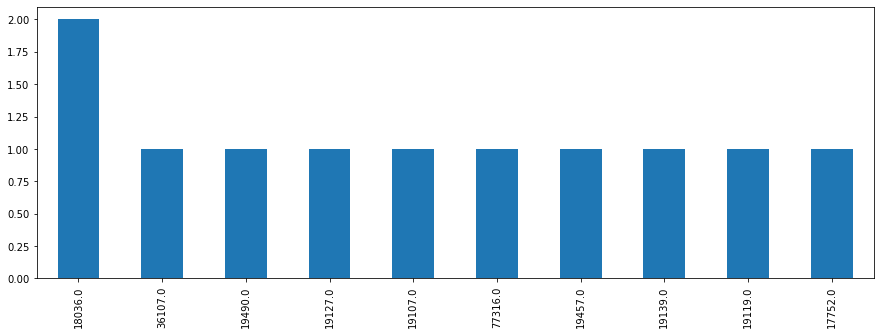

In [33]:
# Lets analyse the least frequent calls from the zipcodes
(calls_df['zip'].value_counts()).tail(10).plot.bar(figsize=(15,5))
plt.show()

#### Least calls ie, around 100 calls recieved from the above 9 zipcode location

### twp - Township

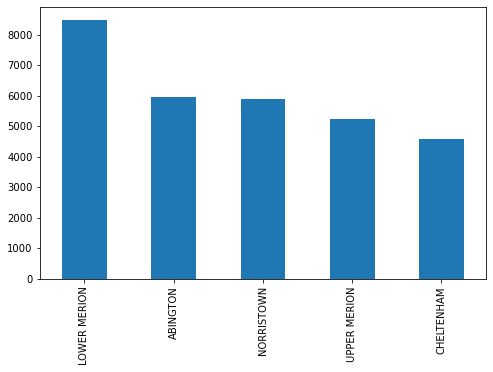

In [34]:
# Lets check the top 5 & least 5 townships from where the calls are recived

(calls_df['twp'].value_counts()).head(5).plot.bar(figsize=(8,5))
plt.show()

#### HIghest number of calls are recieved from Lower Merion township

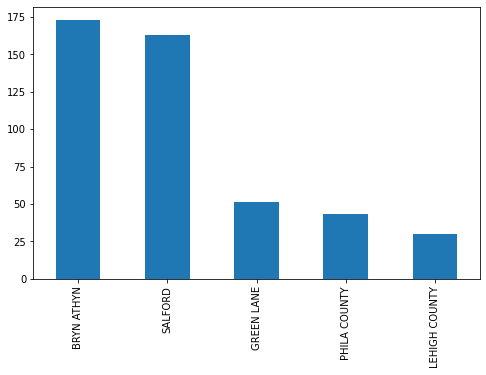

In [35]:
# Lets check the top 5 townships from where the calls are recived

(calls_df['twp'].value_counts()).tail(5).plot.bar(figsize=(8,5))
plt.show()

- Least calls are recieved from Lehigh County

### Year

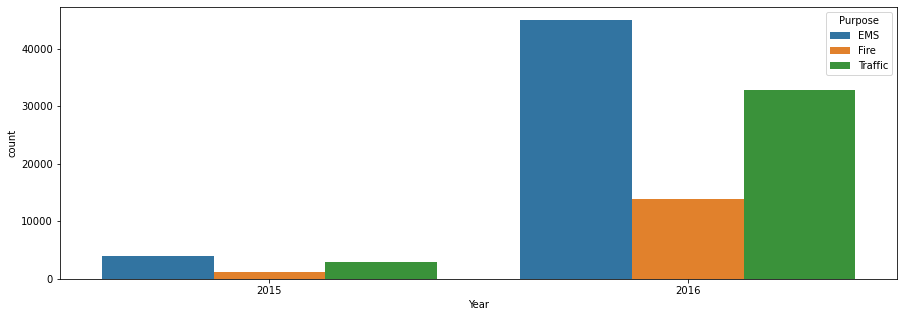

In [36]:
# Lets check which year has received hightset calls based on the Purpose 
plt.figure(figsize = (15,5))
sns.countplot(calls_df['Year'] ,hue = calls_df['Purpose'] )
plt.show()

#### Most of the calls received in the year 2016 are due to EMS -Emergency Medical services

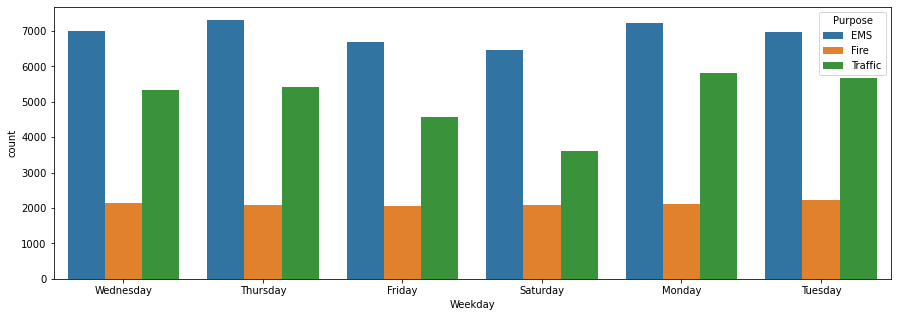

In [37]:
# Lets check which year has received hightset calls
plt.figure(figsize = (15,5))
sns.countplot(calls_df['Weekday'], hue = calls_df['Purpose'] )
plt.show()

- Close to 90k calls are recived in year 2015

### Month

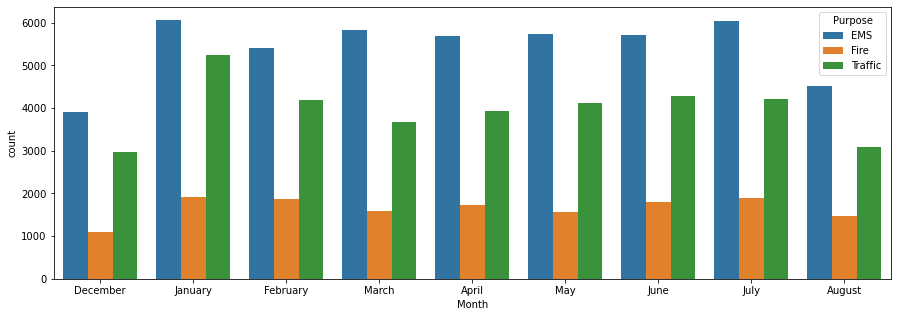

In [38]:
# Lets check which year has received hightset calls
plt.figure(figsize = (15,5))
sns.countplot(calls_df['Month'], hue = calls_df['Purpose'] )
plt.show()

### Bivariate Analysis

<Figure size 1080x720 with 0 Axes>

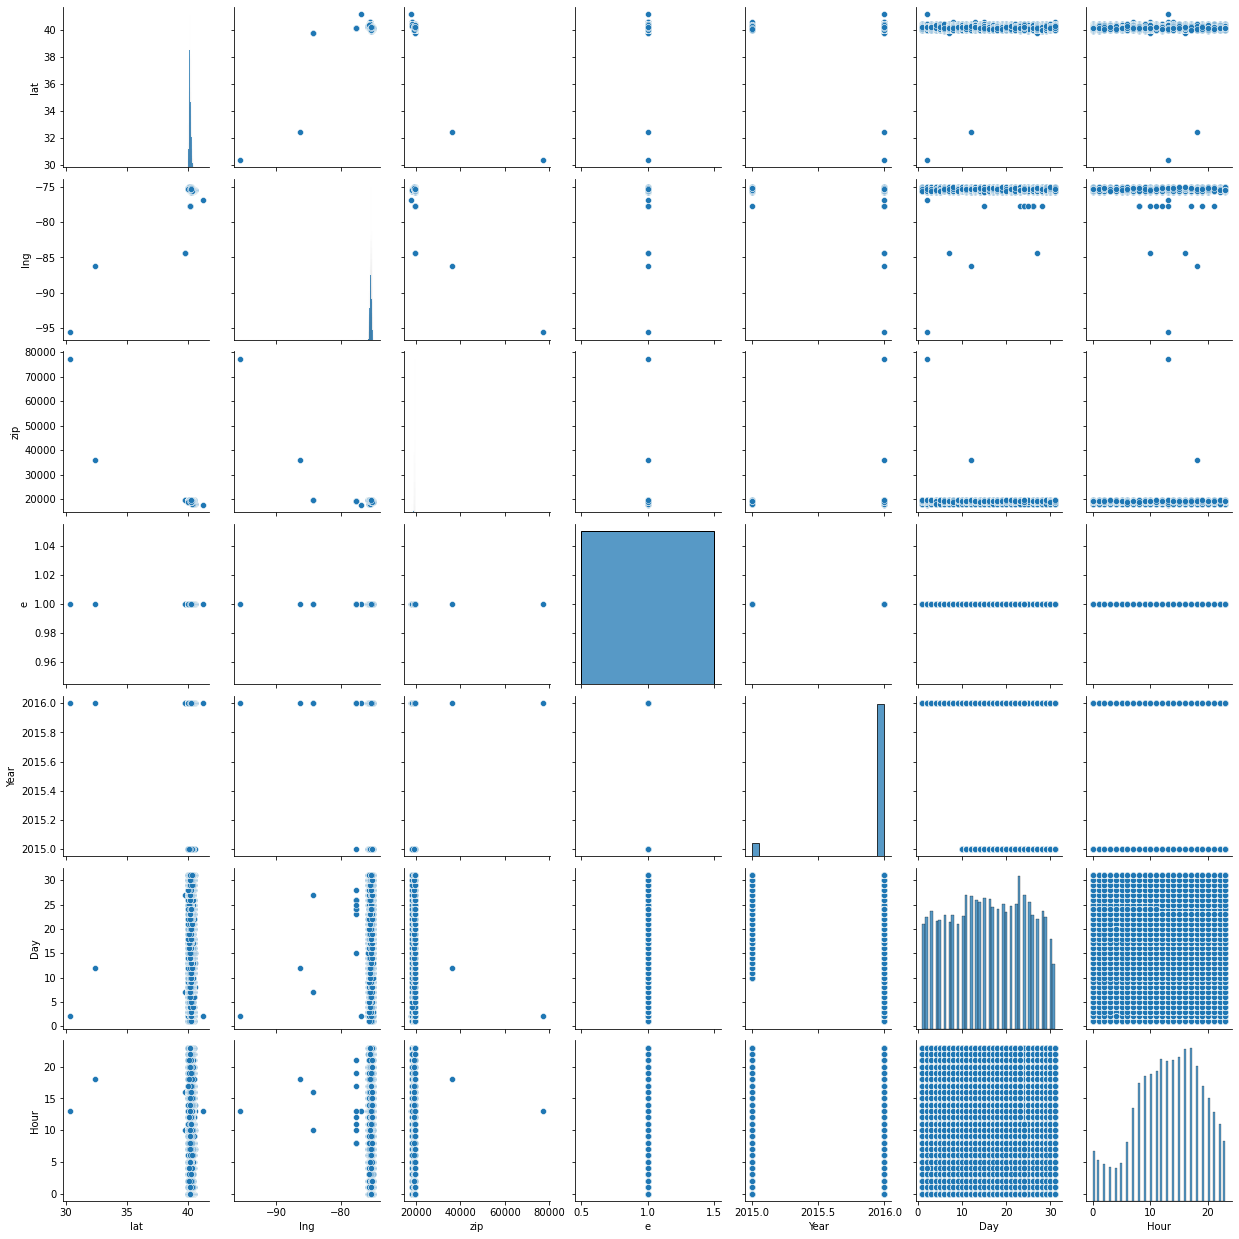

In [39]:
# Lets plot Pair plot

plt.figure(figsize = (15,10))
sns.pairplot(calls_df)
plt.show()

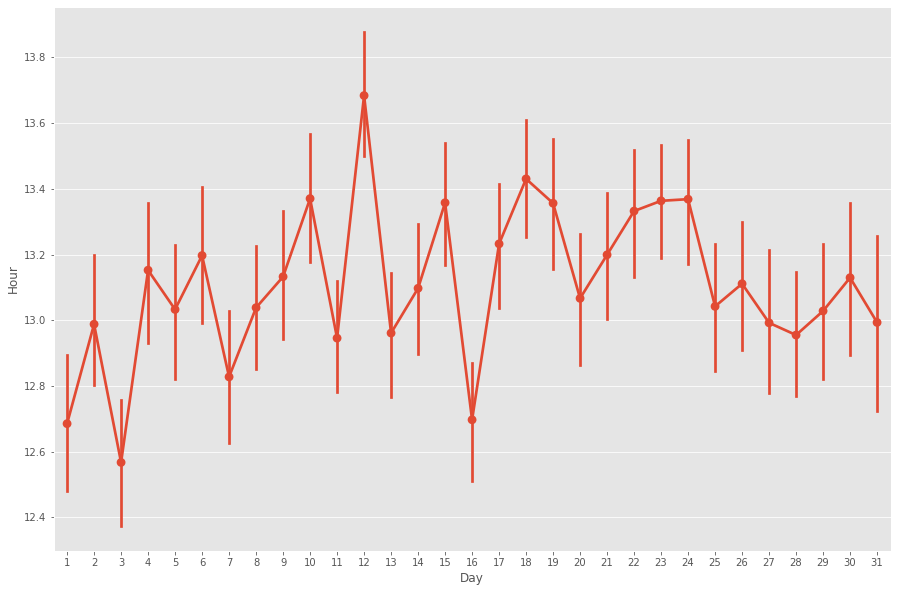

In [40]:
# Lets plot line plot for hour & Day
plt.figure(figsize = (15,10))
plt.style.use('ggplot')
sns.pointplot(x = calls_df['Day'] ,y =calls_df['Hour'] )
plt.show()

### Multivariate Analyisis

In [41]:
# Lets check the count of calls in weekday

weekday_df = calls_df.groupby(['Weekday'])['zip','twp','Purpose','Month'].count()
weekday_df

,zip,twp,Purpose,Month
Weekday,,,,
Friday,13336,13336,13336,13336
Monday,15150,15150,15150,15150
Saturday,12136,12136,12136,12136
Thursday,14833,14833,14833,14833
Tuesday,14879,14879,14879,14879
Wednesday,14478,14478,14478,14478


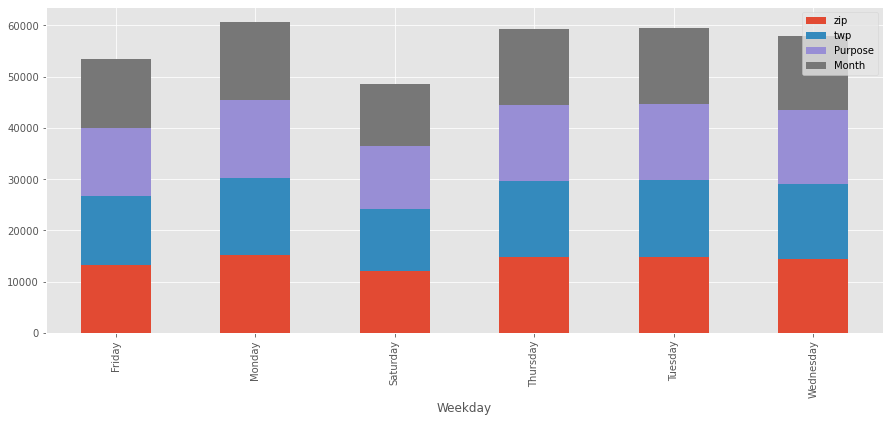

In [42]:
# Lets plot a stacked bar plot to understand all the variables counts
weekday_df.plot.bar(stacked = True , figsize = (15,6))
plt.show()

- Highest calls Observed on Monday & least on Saturday

In [43]:
#Lets check the count of calls in Month

Month_df = calls_df.groupby(['Month'])['zip','twp','Purpose','Weekday'].count()
Month_df

,zip,twp,Purpose,Weekday
Month,,,,
April,11326,11326,11326,9728
August,9078,9078,9078,7567
December,7969,7969,7969,6712
February,11467,11467,11467,9503
January,13205,13205,13205,11478
July,12137,12137,12137,10445
June,11786,11786,11786,10169
March,11101,11101,11101,9566
May,11423,11423,11423,9644


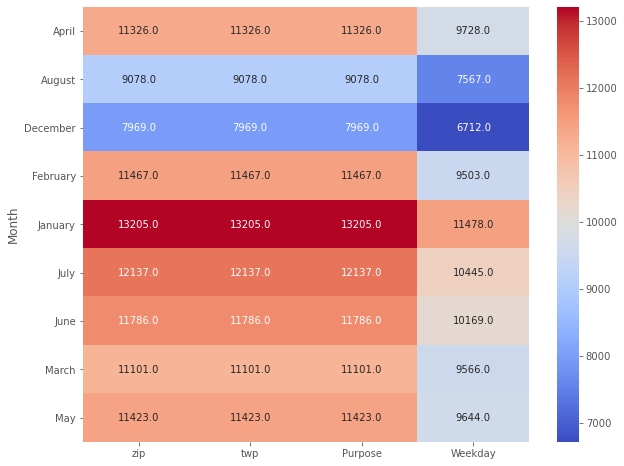

In [44]:
# Lets plot a Heat map

plt.figure(figsize = (10,8))
sns.heatmap(Month_df, annot = True , cmap = 'coolwarm' , fmt = '.1f')
plt.show()

- Highest calls are made during January there is a dip observed from August to December as the months are missing in between

In [45]:
#Lets check the count of calls each Hour

Hourly_calls = calls_df.groupby(['Hour'])['zip','twp','Purpose','Weekday','Month'].count()
Hourly_calls

,zip,twp,Purpose,Weekday,Month
Hour,,,,,
0,2112,2112,2112,1830,2112
1,1721,1721,1721,1500,1721
2,1549,1549,1549,1348,1549
3,1435,1435,1435,1241,1435
4,1418,1418,1418,1214,1418
5,1629,1629,1629,1362,1629
6,2513,2513,2513,2116,2513
7,3970,3970,3970,3317,3970
8,5044,5044,5044,4225,5044


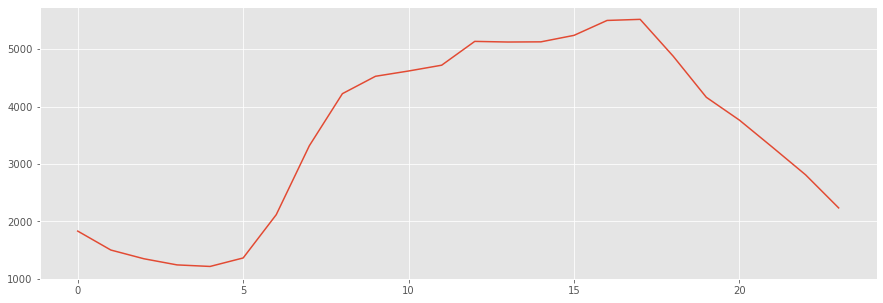

In [46]:
# Lets plot line 
plt.figure(figsize = (15 ,5))
plt.plot(Hourly_calls['Weekday'])
plt.show()

- We can observe an increasing pattern from 8:00 hrs to 17:00 hrs on weekdays as most of the people call due to EMS & Traffic purpose
- After 6pm we can observe a down trend in calls till 23:00 hrs

### Correaltion Matrix 

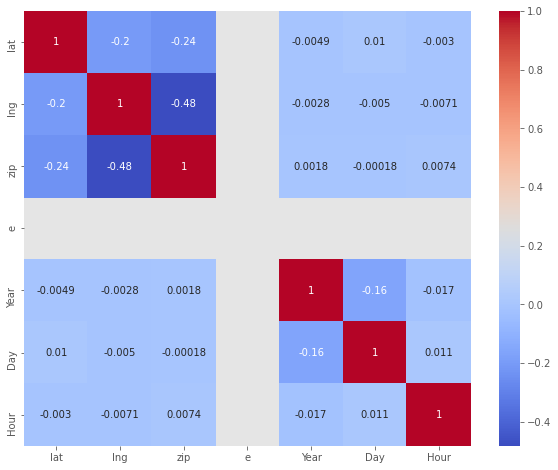

In [47]:
plt.figure(figsize = (10,8))
sns.heatmap(calls_df.corr(), annot = True , cmap = 'coolwarm')
plt.show()

- We can observe ther is no much relationship between the variables & No multicollinearity oserved